<a href="https://colab.research.google.com/github/KalharaBatangala/FashionMNIST/blob/main/FashionImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms

from PIL import Image   # just import only class Image
import matplotlib.pyplot as plt


Flattening destroys locality
<br>Convolutions preserve it

In [2]:
# Convert PIL images to pytorch tensors
transforms = transforms.ToTensor()

In [3]:
# load train dataset
train_data = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms
)

# no of training exmples
print(f'Number of training examples {len(train_data)}')

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.1MB/s]

Number of training examples 60000


torch.Size([1, 28, 28])
torch.Size([28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

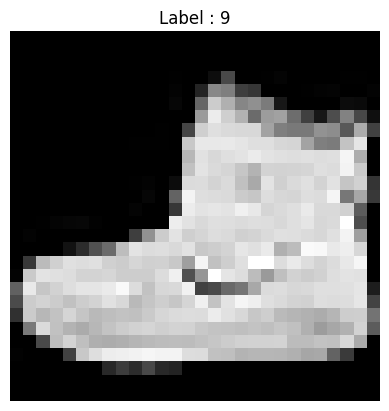

In [4]:
image, label = train_data[0]  # take one training exmple

print(image.shape)  # [1,28,28] (C, H, W) because it is a pytorch tensor
img_2d = image.squeeze()  # remove channel dimension
print(img_2d.shape) # now (H, W)
plt.imshow(img_2d, cmap='gray')  # it work with matplotlib
plt.title(f"Label : {label}")
plt.axis("off")
# matplotlib expects ---> (H, W) for grayscale and (H, W, C) for color
# pytorch returns ---> (C, H, W) but this is different in tensorflow. Channel last

in pytorch, channel is the first value <br>
torch.Size([1,28,28]) only 1 channel

In [5]:
# load test dataset
test_data = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms
)


In [6]:
print(f'Number of test examples {len(test_data)}')

Number of test examples 10000


In [7]:
from torch.utils.data import DataLoader

In [8]:
batch_size = 64

train_loader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)



In [9]:
# Inspect one batch
images, labels = next(iter(train_loader))

print("Batch image shape:", images.shape)
print("Batch labels shape:", labels.shape)


Batch image shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])


In [10]:
import torch.nn as nn

**Convolutional block - 1**

In [11]:
conv_layer = nn.Conv2d(
    in_channels=1,
    out_channels=32,
    kernel_size=3,
    stride=1,
    padding=1   # keep spatial size
)

relu = nn.ReLU()
pool = nn.MaxPool2d(
    kernel_size=2,    # half the size
    stride=2
)


This is a feature extractor. Next we want a classifier, <br>
that means a fully connected layer

In [15]:
# Pass one batch through the block
images, labels = next(iter(train_loader))

x = conv_layer(images)
x = relu(x)
x = pool(x)

print("After Conv:", conv_layer(images).shape)
print("After ReLU:", relu(conv_layer(images)).shape)
print("After Pool:", x.shape)

After Conv: torch.Size([64, 32, 28, 28])
After ReLU: torch.Size([64, 32, 28, 28])
After Pool: torch.Size([64, 32, 14, 14])


torch.Size([64, 32, 28, 28]) <br>
this always follows the pytorch's convention (N, C, H, W)
<br>
64 = batch size (N) meaning 64 different stacks of
<br> 32 feature maps

CNNs do NOT detect objects <br> <br>
They detect **features**

**Classifier**

In [16]:
fc = nn.Linear(32 * 14 * 14, 10)  # 10 classes in fashionMNIST

# Forward pass continued
x = x.view(x.size(0), -1)  # Flatten

print("After flatten:", x.shape)

x = fc(x)

print("After Linear:", x.shape)   # gives 10 output logits

After flatten: torch.Size([64, 6272])
After Linear: torch.Size([64, 10])


Logits = raw, unnormalized scores produced by the model

In [17]:
print("hello")

hello
